In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1.Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
### Определите две самые скоррелированные и две наименее скоррелированные переменные

In [11]:
df_new = df[['satisfaction_level','last_evaluation','number_project',
             'average_montly_hours','time_spend_company','Work_accident',
             'left','promotion_last_5years']].copy()
df_new.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


<Axes: >

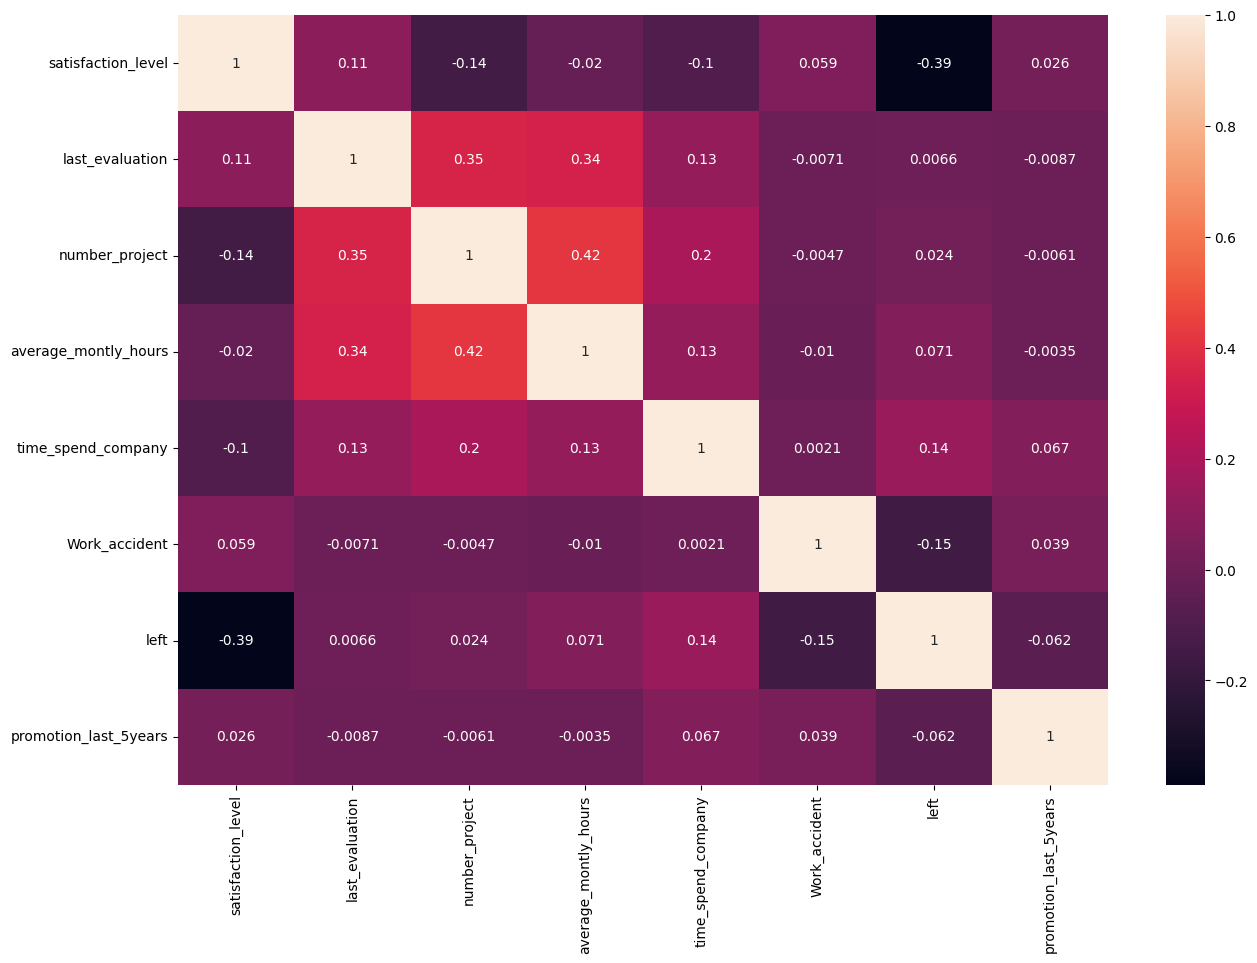

In [55]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_new.corr(), annot = True)

In [51]:
#определим наименее скоррелированную пару, чем ближе к 0, тем менее выражена корреляция
df_new.corr().abs().min().reset_index().sort_values(by=0).head(2)

,index,0
4,time_spend_company,0.00212
5,Work_accident,0.00212


In [53]:
#определим наиболее скоррелированную пару, чем ближе к 1|-1, тем более выражена корреляция
df_new.corr().abs().replace(1,0).max().reset_index().sort_values(by=0).tail(2)

,index,0
2,number_project,0.417211
3,average_montly_hours,0.417211


###4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [57]:
df.department.value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

### 5. Показать распределение сотрудников по зарплатам.

In [61]:
df.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

###6. Показать распределение сотрудников по зарплатам в каждом  департаменте по отдельности

In [60]:
df.pivot_table(
    index=['department','salary'],
    values = 'left',
    aggfunc = 'count'
).rename(columns={"left": "staff"})

staff
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

###7. Проверить гипотезу, что сотрудники с высоким окладом
### проводят на работе больше времени, чем сотрудники с низким окладом

<Axes: xlabel='salary', ylabel='average_montly_hours'>

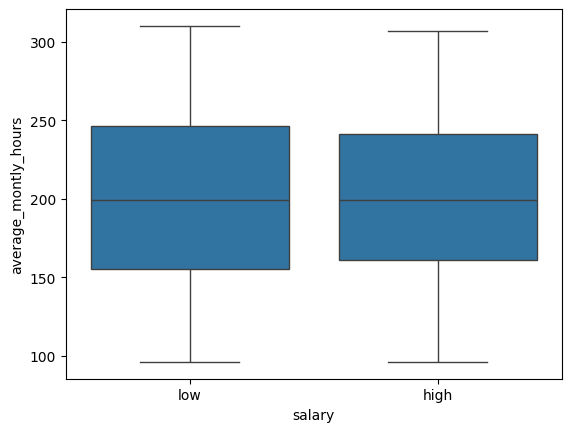

In [92]:
df_h_l = df.query('salary!="medium"')
sns.boxplot(
    y = 'average_montly_hours',
    x = 'salary',
    data = df_h_l
)

<Axes: xlabel='average_montly_hours', ylabel='Count'>

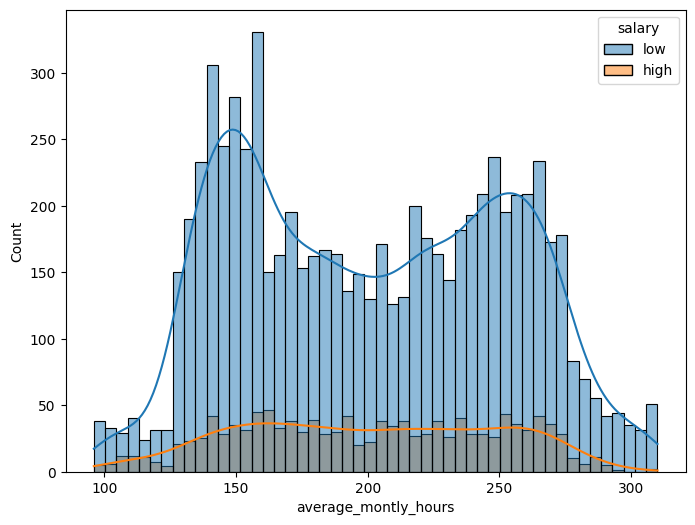

In [76]:
plt.figure(figsize = (8, 6))
sns.histplot(
    data = df_h_l,
    x = 'average_montly_hours',
    hue = 'salary',
    bins = 50,
    kde = 1)

In [87]:
df_h = df.query('salary == "high"').average_montly_hours
df_l = df.query('salary == "low"').average_montly_hours

TtestResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259, df=8551.0)

In [88]:
#     Нулевая гипотеза (H0): медиана одинакова для всех групп данных.
#     Альтернативная гипотеза: (H1): медиана не одинакова для всех групп данных
stats.ttest_ind(df_h, df_l)

TtestResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259, df=8551.0)

In [91]:
print('Поскольку p-значение больше, чем альфа 0,05 , мы не можем отвергнуть нулевую \nгипотезу о том, что среднее значение одинаково в группах')
print('Таким образом, влияние зарплаты на время работы не подтвердилось')

Поскольку p-значение больше, чем альфа 0,05 , мы не можем отвергнуть нулевую 
гипотезу о том, что среднее значение одинаково в группах
Таким образом, влияние зарплаты на время работы не подтвердилось


### 8. Рассчитать следующие показатели среди уволившихся и не
### уволившихся сотрудников (по отдельности):

In [139]:
df_left= df.query('left==1')
df_stay= df.query('left==0')

In [141]:
#Доля сотрудников с повышением за последние 5 лет
left_promo = len(df_left.query('promotion_last_5years ==1')) / len(df_left)
stay_promo = len(df_stay.query('promotion_last_5years ==1')) / len(df_stay)

In [145]:
print(
    f'Доля сотрудников с повышением за последние 5 лет среди покинувших компанию {left_promo *100:.2f}%')
print(
    f'Доля сотрудников с повышением за последние 5 лет среди оставшихся в компании {stay_promo*100:.2f}%')

Доля сотрудников с повышением за последние 5 лет среди покинувших компанию 0.53%
Доля сотрудников с повышением за последние 5 лет среди оставшихся в компании 2.63%


In [149]:
#Средняя степень удовлетворенности (судя по значениям, измеряется в процентах)
print(
    f'Для сотрудников, покинувших компанию, средняя степень удовлетворенности: {df_left.satisfaction_level.mean()*100:.2f}%')

print(
    f'Для сотрудников, не покинувших компанию, средняя степень удовлетворенности:{df_stay.satisfaction_level.mean()*100:.2f}%')


Для сотрудников, покинувших компанию, средняя степень удовлетворенности: 44.01%
Для сотрудников, не покинувших компанию, средняя степень удовлетворенности:66.68%


In [151]:
#Среднее количество проектов
print(
    f'Для сотрудников, покинувших компанию, среднее кол-во проектов: {df_left.number_project.mean():.2f}')

print(
    f'Для сотрудников, не покинувших компанию, среднее кол-во проектов:{df_stay.number_project.mean():.2f}')

Для сотрудников, покинувших компанию, среднее кол-во проектов: 3.86
Для сотрудников, не покинувших компанию, среднее кол-во проектов:3.79


#### 9.Разделить данные на тестовую и обучающую выборки
#### Построить модель LDA, предсказывающую уволился ли
#### сотрудник на основе имеющихся факторов (кроме department и
#### salary)
#### Оценить качество модели на тестовой выборки

In [161]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['left','department','salary']), df['left'] , test_size=0.2)

In [162]:
lda = LinearDiscriminantAnalysis()
lda.fit_transform(x_train,y_train)

array([[ 2.02152218],
       [ 0.06138013],
       [-2.36777564],
       ...,
       [ 0.10606761],
       [ 0.76549748],
       [ 1.97121734]])

In [163]:
y_pred= lda.predict(x_test)


In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test,
                                y_pred=y_pred,
                                target_names=["Stay", "Leave"]))

              precision    recall  f1-score   support

        Stay       0.80      0.92      0.85      2276
       Leave       0.51      0.26      0.35       724

    accuracy                           0.76      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.76      0.73      3000



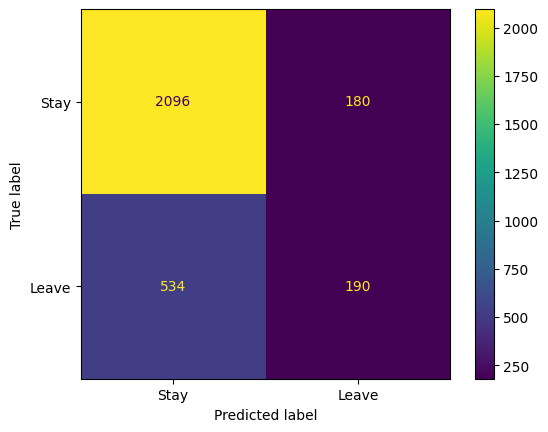

In [165]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                      display_labels=["Stay", "Leave"])

Взвешенные значения precision: 0.73; recall: 0.76.\
 Модель лучше предсказывает людей, которые останутся. \
 f1 score: для Stay – 0.85, для Leave – 0.35